In [ ]:
!pip install simpletransformers

In [ ]:
import pandas as pd
import numpy as np
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
!python --version

Python 3.10.12


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/teknofest_train_final.csv",sep="|")
df.head()

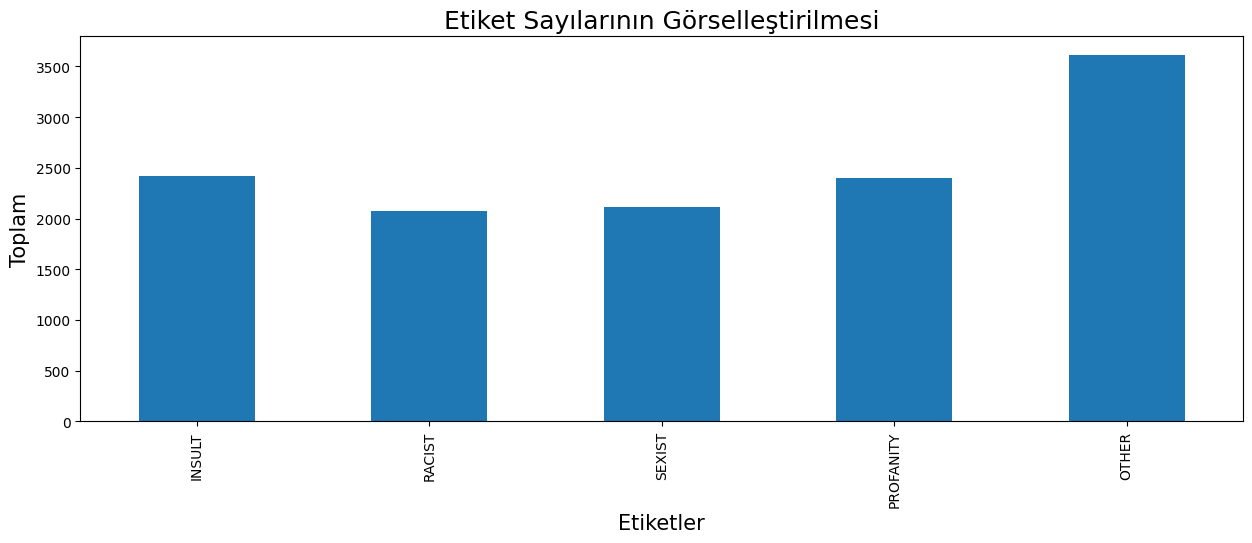

In [ ]:
# TARGET sütunundaki kategoriler bulundu.
tags = Counter(df["target"]).keys()
# TARGET sütunundaki kategorilerin adeti bulundu.
tags_len = Counter(df["target"]).values()

# Kategori ismi ve adet sayısı veri seti haline getirildi.
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Sinif", "Toplam"])
# Plot grafiği oluşturuldu.
tag_df.plot(x="Sinif", y="Toplam", kind="bar", legend=False, grid=False, figsize=(15,5))

plt.title("Etiket Sayılarının Görselleştirilmesi", fontsize=18)
plt.xlabel("Etiketler", fontsize=15)
plt.ylabel("Toplam", fontsize=15)
plt.show()

In [ ]:
text = df['text'].values
len(text)

12617

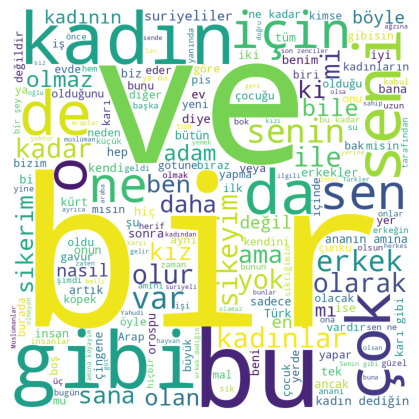

In [ ]:
from wordcloud import WordCloud

# metinleri birleştir
text = " ".join(df['text'])

# kelime bulutu nesnesi oluştur
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# kelime bulutunu görselleştir
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
df.target.value_counts()

OTHER        3616
INSULT       2419
PROFANITY    2398
SEXIST       2112
RACIST       2072
Name: target, dtype: int64

In [ ]:
#her bir text'in kelime sayısı
df['words'] = [len(x.split()) for x in df['text'].tolist()]
df[['text','words']]

,text,words
0,çürük dişli,2
1,Bu adamın islama ve müslümanlara verdiği zarar...,11
2,erkekler zora gelmez,3
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,9
4,otomasyon< sistemlerine= doğrudan bağlanabilir,4
...,...,...
12612,uyuma taklidi yapan tehlikeli bir hayvanın göz...,9
12613,yolda at kavga eden üç oğlan çocuğu görür,8
12614,sizin köpeklerinizin burnu bile daha iyi koku ...,9
12615,hayalleri gerçek etmek için birisinin delilik ...,12


In [ ]:
#Kelime sayısı '0' ve 1 olanlar
min_size = 1
df[df['words'] <= min_size].count()

id              164
text            164
is_offensive    164
target          164
words           164
dtype: int64

In [ ]:
sıfır_birler = df[df['words'] <= min_size]

In [ ]:
#Bu aralık boş olan değerleri ve sadece harf içeren değerlerin aralığıdır.Toplamda 150 adettir.
sıfır_birler[12:-2]

,id,text,is_offensive,target,words
12340,e2d954b7-266d-43be-845e-015a8ecf1241,j,0,RACIST,1
12341,697c1629-d4f6-4e85-87f6-3fa5510f55cf,k,1,RACIST,1
12342,f760cf45-ad05-46e7-9971-2b515decae97,e,1,RACIST,1
12343,03307826-defb-4e34-aa5a-b74ca74c84c2,e,0,RACIST,1
12344,42bf5d9d-48ab-489f-a673-d6d792f97eb9,b,0,SEXIST,1
...,...,...,...,...,...
12485,65ca945d-15af-4d59-8d7d-b731578e45d8,e,1,PROFANITY,1
12486,593b9691-8287-4400-bb22-ca2add665b9a,j,0,OTHER,1
12487,6d93aea2-8130-4168-81ea-bd8557ce3272,b,1,OTHER,1
12488,b89720e0-fdf3-44c8-ae20-14e8fe2d94af,h,0,OTHER,1


In [ ]:
#Veriler silindi
df.drop(sıfır_birler.index[12:-2], inplace=True)

In [ ]:
#İndex değerleri değiştiği için resetlendi
df = df.reset_index(drop=True)

In [ ]:
import nltk
from nltk.corpus import stopwords

# NLTK kütüphanesini kullanarak türkçe dilindeki etkisiz kelimeler (stopwords) indirildi.
nltk.download('stopwords')
# İndirilen etkisiz kelimeleri "stop_words_list" değişkenine atandı.
stop_words_list = stopwords.words('turkish')
# Veri setindeki "text" sütunu altındaki hatalı alanları temizlemek için bir dizi oluşturuldu.
false_text = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""# Preprocess"""
# Ön işleme adımlarını yapmak için fonksiyon tanımlandı.
def preprocess_text(text):
    # Küçük harflere çevirme
    text = text.lower()
    # Satır sonu karakterlerini kaldırma
    import re
    text = re.sub(r'\n', ' ', text)
    # Rakamları kaldırma
    text = re.sub(r'\d', '', text)
    # Noktalama işaretlerini kaldırma
    import string
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Stop-words'leri kaldırma
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    # Veri setindeki hatalı verilerin kaldırılması
    words = [word for word in words if not word in false_text]
    # Tekrarlanan karakterlerin kaldırılması
    words = [re.sub(r'(.)\1{1,}', r'\1\1', word) for word in words]
    # Tekrarlanan boşlukların kaldırılması
    words = [word.strip() for word in words if len(word.strip()) > 1]

    text = " ".join(words)
    return text

In [ ]:
df.dropna(subset=['text'], inplace=True)

df["target"].unique()

# Farklı label'ları farklı sayılara çevirme

df['labels'] = pd.factorize(df.target)[0]

In [ ]:
# Veri setinde "clean_text" adında bir sütün oluşturarak ön işleme fonksiyonu olan "preprocess_text" fonksiyonunu "text" sütünü altındaki verilere uygulayarak "clean_text" sütünuna aktarıldı.
df['clean_text'] = df['text'].apply(preprocess_text)

In [ ]:
# words'lere ihtiyacımız olmadığı için silindi
df = df.drop('words',axis=1)

In [ ]:
# eski textlere ihtiyacımız olmadığı için silindi
df = df.drop('text',axis=1)

In [ ]:
df.head()

,id,is_offensive,target,labels,clean_text
0,81c11060-a240-4d54-841b-9e2916039e85,1,INSULT,0,çürük dişli
1,be80ebbf-b322-4c3b-afa1-94932ea80731,1,RACIST,1,adamın islama müslümanlara verdiği zararı gavu...
2,f99e2513-83ed-4076-ac72-b9e2cff3f049,1,SEXIST,2,erkekler zora gelmez
3,83ed2b2e-b815-4f36-9fc4-80a9050cf2d0,1,PROFANITY,3,utanmazın götüne kazık sokmuşlar tıkırtı nered...
4,d93e05f7-bfdd-4cdb-99d8-3048761b30ff,0,OTHER,4,otomasyon sistemlerine doğrudan bağlanabilir


In [ ]:
# eriler train ve test olarak ayrıldı
train, test = train_test_split(df, test_size=0.1, random_state=42)

train=train[["clean_text","labels"]]
test=test[["clean_text","labels"]]

train["clean_text"]=train["clean_text"].apply(lambda r: str(r))
train['labels']=train['labels'].astype(int)

In [ ]:
# model tanımlandı
model = ClassificationModel(
    'bert',
    'dbmdz/bert-base-turkish-uncased',
    num_labels=5,
    use_cuda=False,
    args={
        'reprocess_input_data': True,
        'overwrite_output_dir': True,
        'num_train_epochs': 2,
        'train_batch_size': 8,
        'fp16': False,
        'output_dir': 'bert_model'
    }
)
'''EPOCH sayısı az verildi çok yavaş olduğu için colab kullanım sınırlarını aşıyordu. 2 Epoch 5 saatte tamamlandı
ve batch_size düşürüldü çünkü colab ortamında RAM hatası verdi.'''

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

'EPOCH sayısı az verildi çok yavaş olduğu için colab kullanım sınırlarını aşıyordu. 2 Epoch 5 saatte tamamlandı\nve batch_size düşürüldü çünkü colab ortamında RAM hatası verdi.'

In [ ]:
model.train_model(train)

result, model_outputs, wrong_predictions = model.eval_model(test)
predictions = model_outputs.argmax(axis=1)
actuals = test.labels.values


model_name = "turkish_bert_model-deneme"
model_path = f"{model_name}"
model.save_model(model_path)

In [ ]:
#Predict fonksiyon
def predict(texts):
    model_path = "/content/drive/MyDrive/bert_model"
    model = ClassificationModel('bert', model_path, use_cuda=False)
    predictions, _ = model.predict(texts)
    return [result_predict(prediction) for prediction in predictions]

def result_predict(num):
    if num == 4:
        return 'OTHER'
    elif num == 1:
        return 'RACIST'
    elif num == 0:
        return 'INSULT'
    elif num == 3:
        return 'PROFANITY'
    elif num == 2:
        return 'SEXIST'

In [ ]:
# Örnek kullanım
text_to_predict = ["erkek işine karışma kadın halinle"]
results = predict(text_to_predict)

for text, result in zip(text_to_predict, results):
    print(f"Metin: {text}\nTahmin: {result}\n")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Metin: erkek işine karışma kadın halinle
Tahmin: SEXIST



  0%|          | 0/1247 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

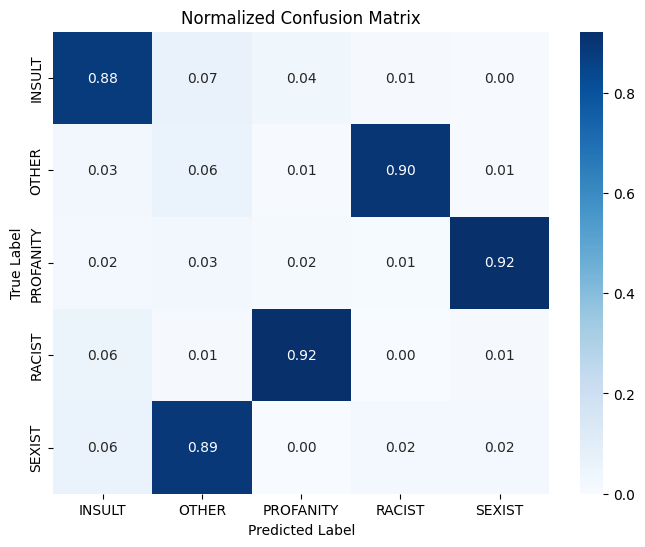

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# test verileri yüklendi
test_data = test['clean_text'].tolist()

# Tahminleri al
predictions = predict(text_to_predict)

# Gerçek etiketleri al
true_labels = test['labels'].tolist()

# sınıf isimleri numerik olarak çevrildi
class_mapping = {'INSULT': 0, 'OTHER': 1, 'PROFANITY': 2, 'RACIST': 3, 'SEXIST': 4}
numeric_predictions = [class_mapping[label] for label in predictions]

# confusion matrix
cm = confusion_matrix(true_labels, numeric_predictions)

class_names = ['INSULT', 'OTHER', 'PROFANITY', 'RACIST', 'SEXIST']

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# GRADİO ARAYÜZÜ

In [ ]:
!pip install gradio

In [17]:
import gradio as gr

def predict(text):
    model_path = "/content/drive/MyDrive/bert_model"
    model = ClassificationModel('bert', model_path, use_cuda=False)
    prediction, _ = model.predict([text])
    return result_predict(prediction[0])

def result_predict(num):
    if num == 4:
        return 'OTHER'
    elif num == 1:
        return 'RACIST'
    elif num == 0:
        return 'INSULT'
    elif num == 3:
        return 'PROFANITY'
    elif num == 2:
        return 'SEXIST'

# Gradio arayüzünü oluştur
iface = gr.Interface(
    fn=predict,  # Kullanıcıdan alınan metni modelinize ileten fonksiyon
    inputs=gr.Textbox(),  # Kullanıcıdan metin girişi alın
    outputs=gr.Textbox(),  # Model çıktısını görüntülemek için metin kutusu
    live=True,
    title='Yorum Tespiti',
    css='''span{text-transform: uppercase} p{text-align: center}'''
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5aca050778fbb623b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
